In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/wine.csv', header=None)
X = df.iloc[:, :12]
y = df.iloc[:, 12]

In [3]:
X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=0.2, shuffle=True)

In [4]:
model = Sequential()
model.add(layers.Dense(30, input_dim = 12, activation='relu'))
model.add(layers.Dense(12, activation='relu')) 
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [5]:
history = model.fit(X_train, y_train, epochs=2000, batch_size= 500,
                   validation_split=0.25, verbose=0)

In [6]:
hist_df = pd.DataFrame(history.history) # 정보를 갖고 있는 history 객체
hist_df

,loss,accuracy,val_loss,val_accuracy
0,2.700251,0.760072,1.653932,0.765385
1,1.131452,0.796254,0.411588,0.850769
2,0.448227,0.763664,0.335062,0.837692
3,0.326612,0.853220,0.330186,0.866154
4,0.341198,0.860919,0.254178,0.886923
...,...,...,...,...
1995,0.022832,0.994098,0.096750,0.980000
1996,0.026829,0.992302,0.090201,0.983846
1997,0.024900,0.992815,0.084774,0.983077
1998,0.027245,0.992045,0.082402,0.985385


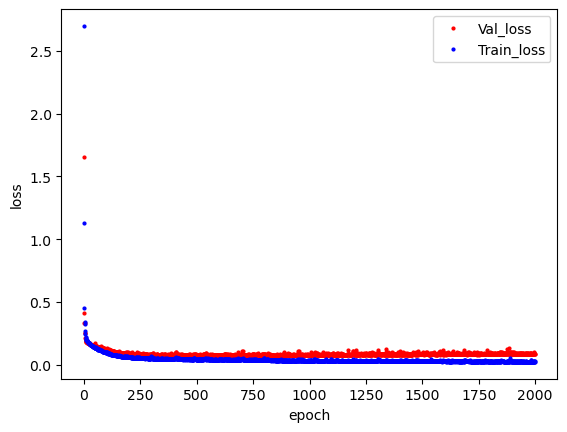

In [7]:
y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, 'o', c='red', markersize=2, label='Val_loss') # 검증
plt.plot(x_len, y_loss, 'o', c='blue', markersize=2, label='Train_loss') # 학습
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()